### Matthew Collins
#### DSC 680 Applied Datascience
#### Week 1-4 Project: Predicting Heart Disease

In [1]:
# Import the libraries to use

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# import and view the dataset

df = pd.read_csv('heart_disease.csv') # load the data

df.head() # view the data frame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Provide stastical description of the data 

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Check for duplicate data

df2 = df[df.duplicated()]
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
# Remove duplicate row from the dataset 

df = df.drop_duplicates()
df.shape

(302, 14)

In [6]:
# Check the data set for missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [72]:
# Further understanding the type of data in the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Text(0.5, 1, 'Heart Disease Data Correlation Heatmap')

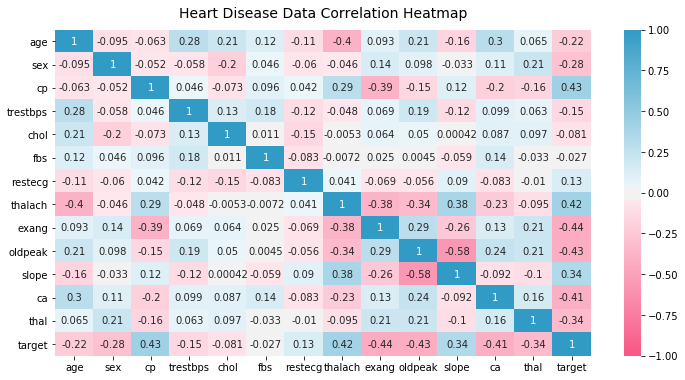

In [86]:
# Evaluate which of the 14 features correlate

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)  # Creates a diverging color pallette to help view

plt.figure(figsize = (12, 6))
corr_map = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap)

corr_map.set_title('Heart Disease Data Correlation Heatmap', fontdict = {'fontsize': 14}, pad = 12)

In [134]:
# Determine if any features can be eliminated due to a high correlation

cor = df.corr()

cor_target = abs(cor['target'])  # make all values positive

relevant_features = cor_target[cor_target > 0.5] # filter out high correlation features
relevant_features


target    1.0
Name: target, dtype: float64

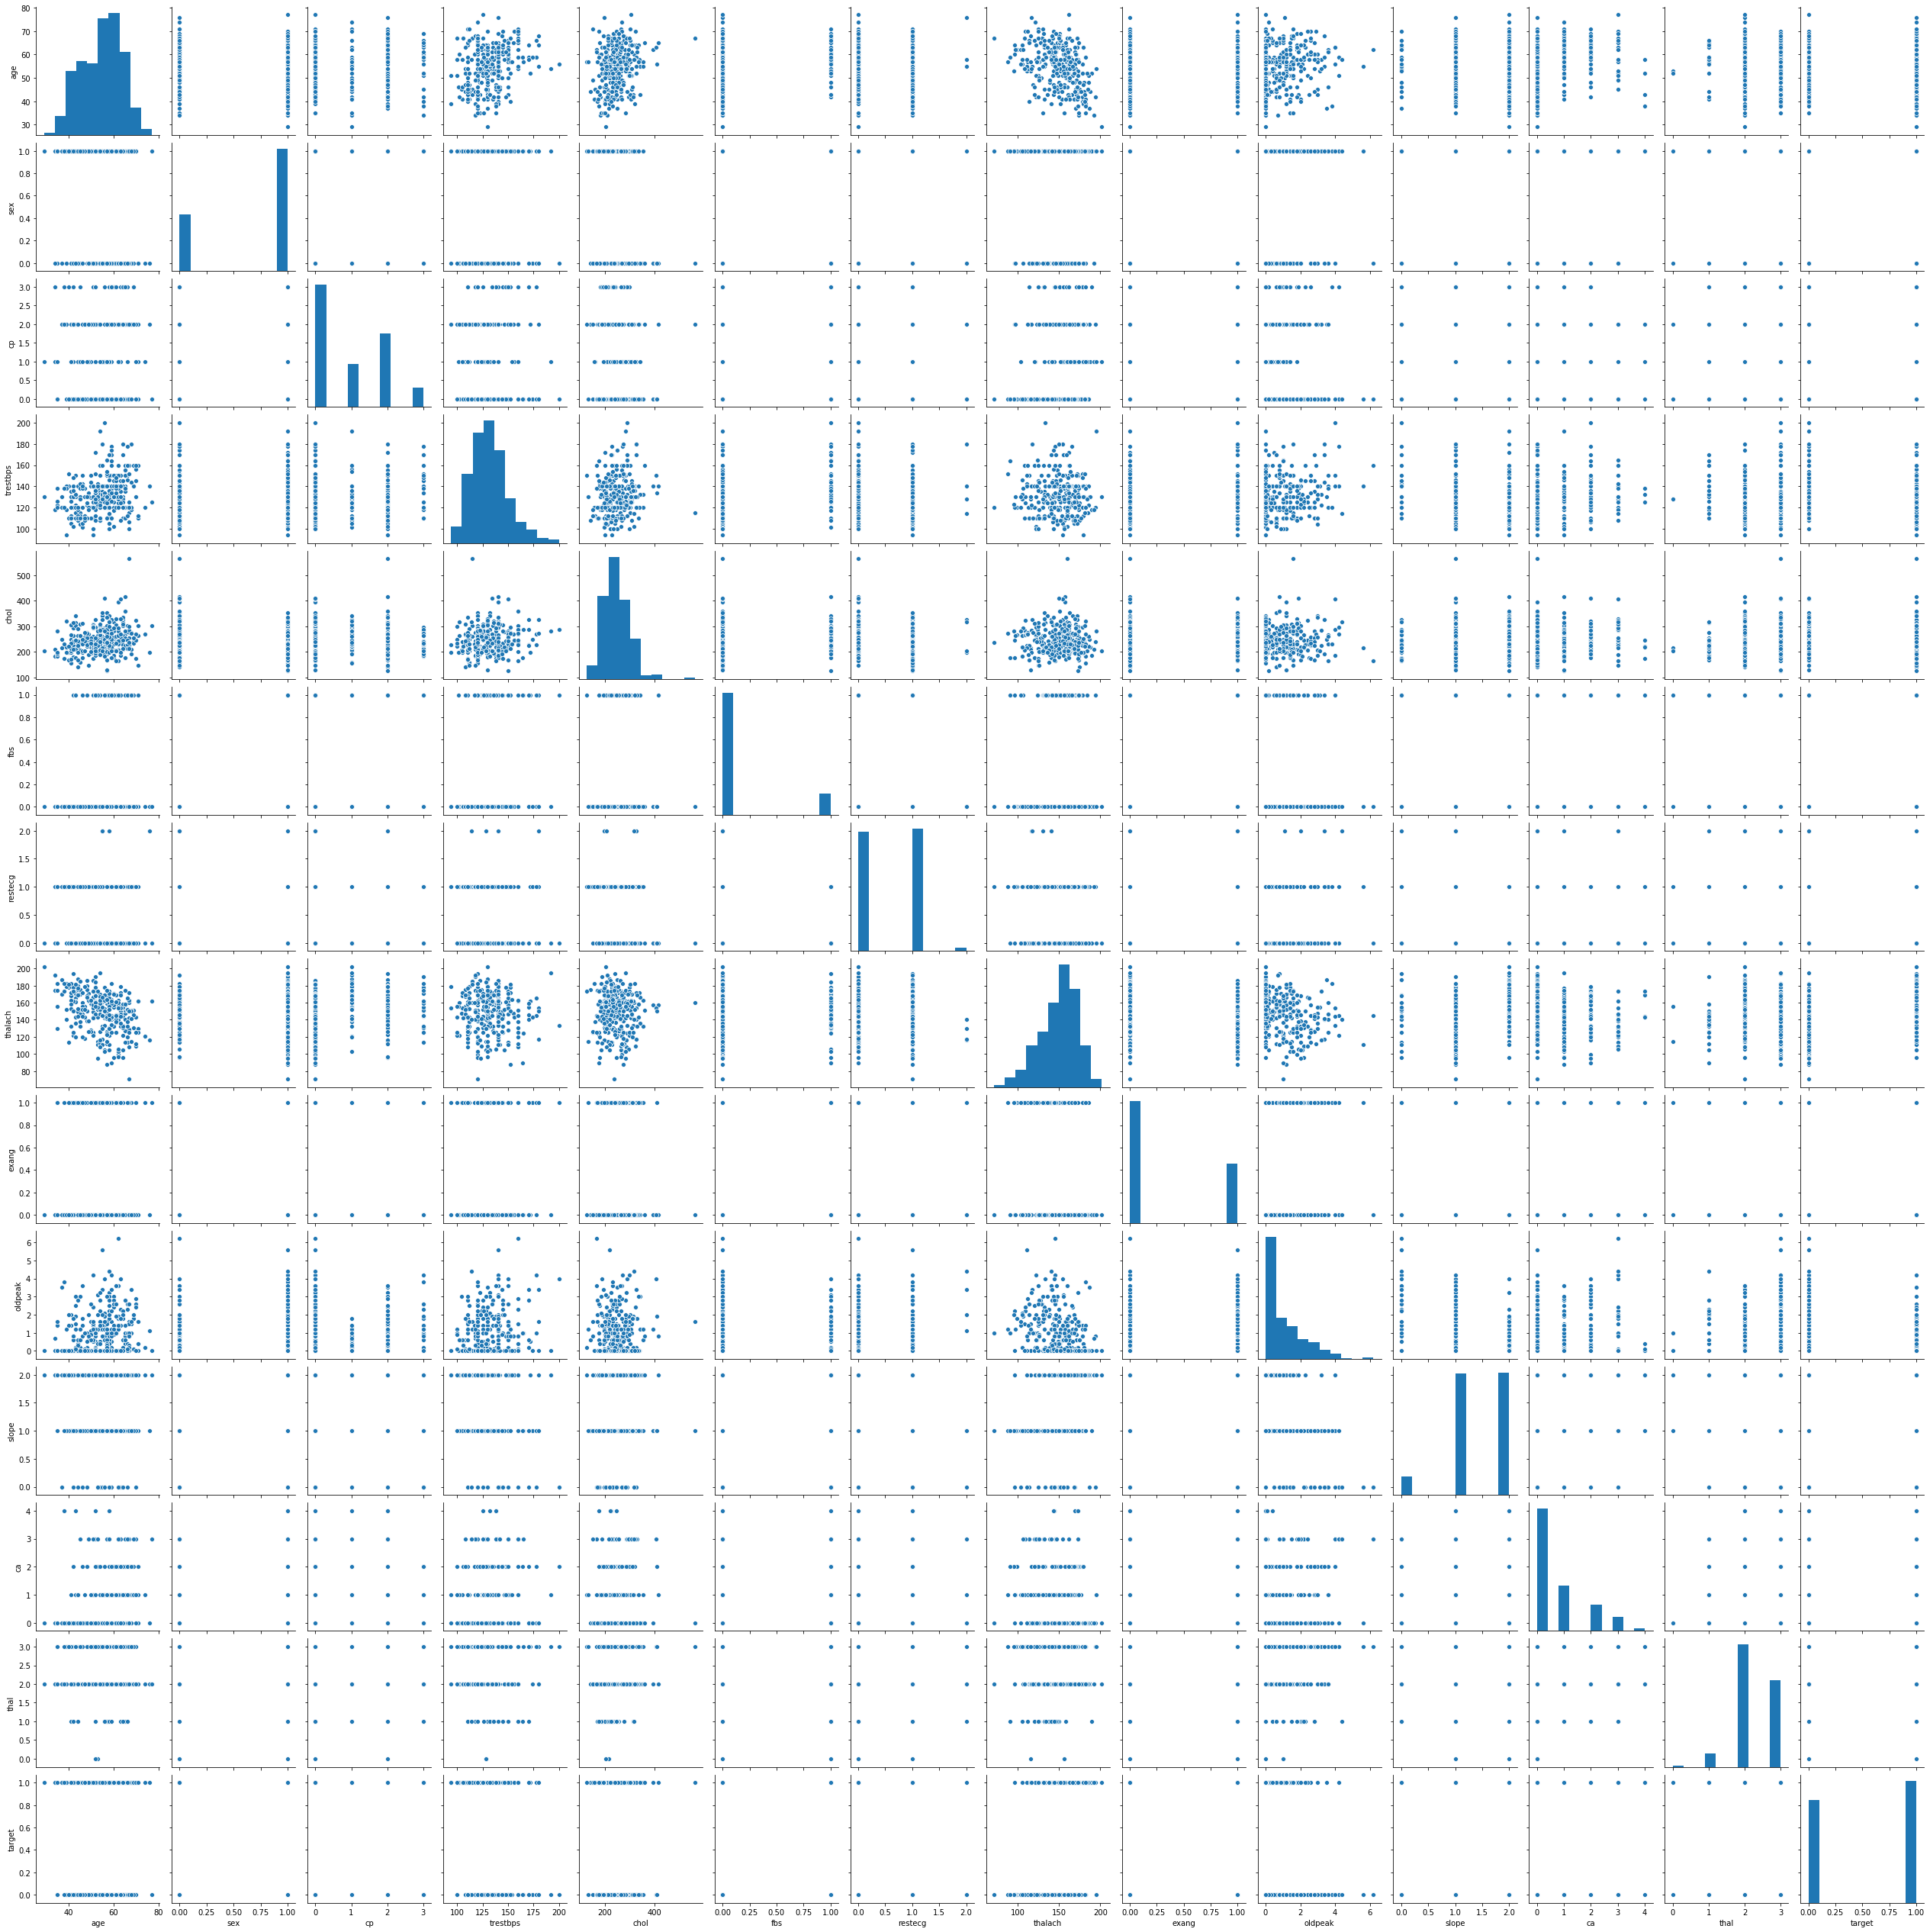

In [74]:
# Use a scatter plot matrix to compare the features to one another

sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A48D4F74C8>,
      dtype=object)

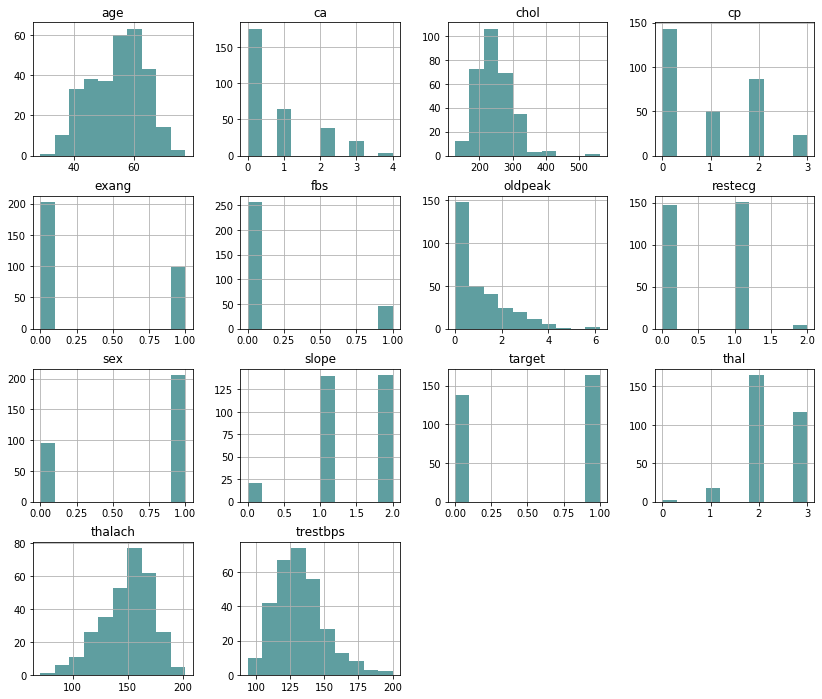

In [107]:
# Evaluate the data spread using histograms

df.hist(figsize = (14, 12), color = 'cadetblue')


C:\Users\mcollins\Anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\mcollins\Anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


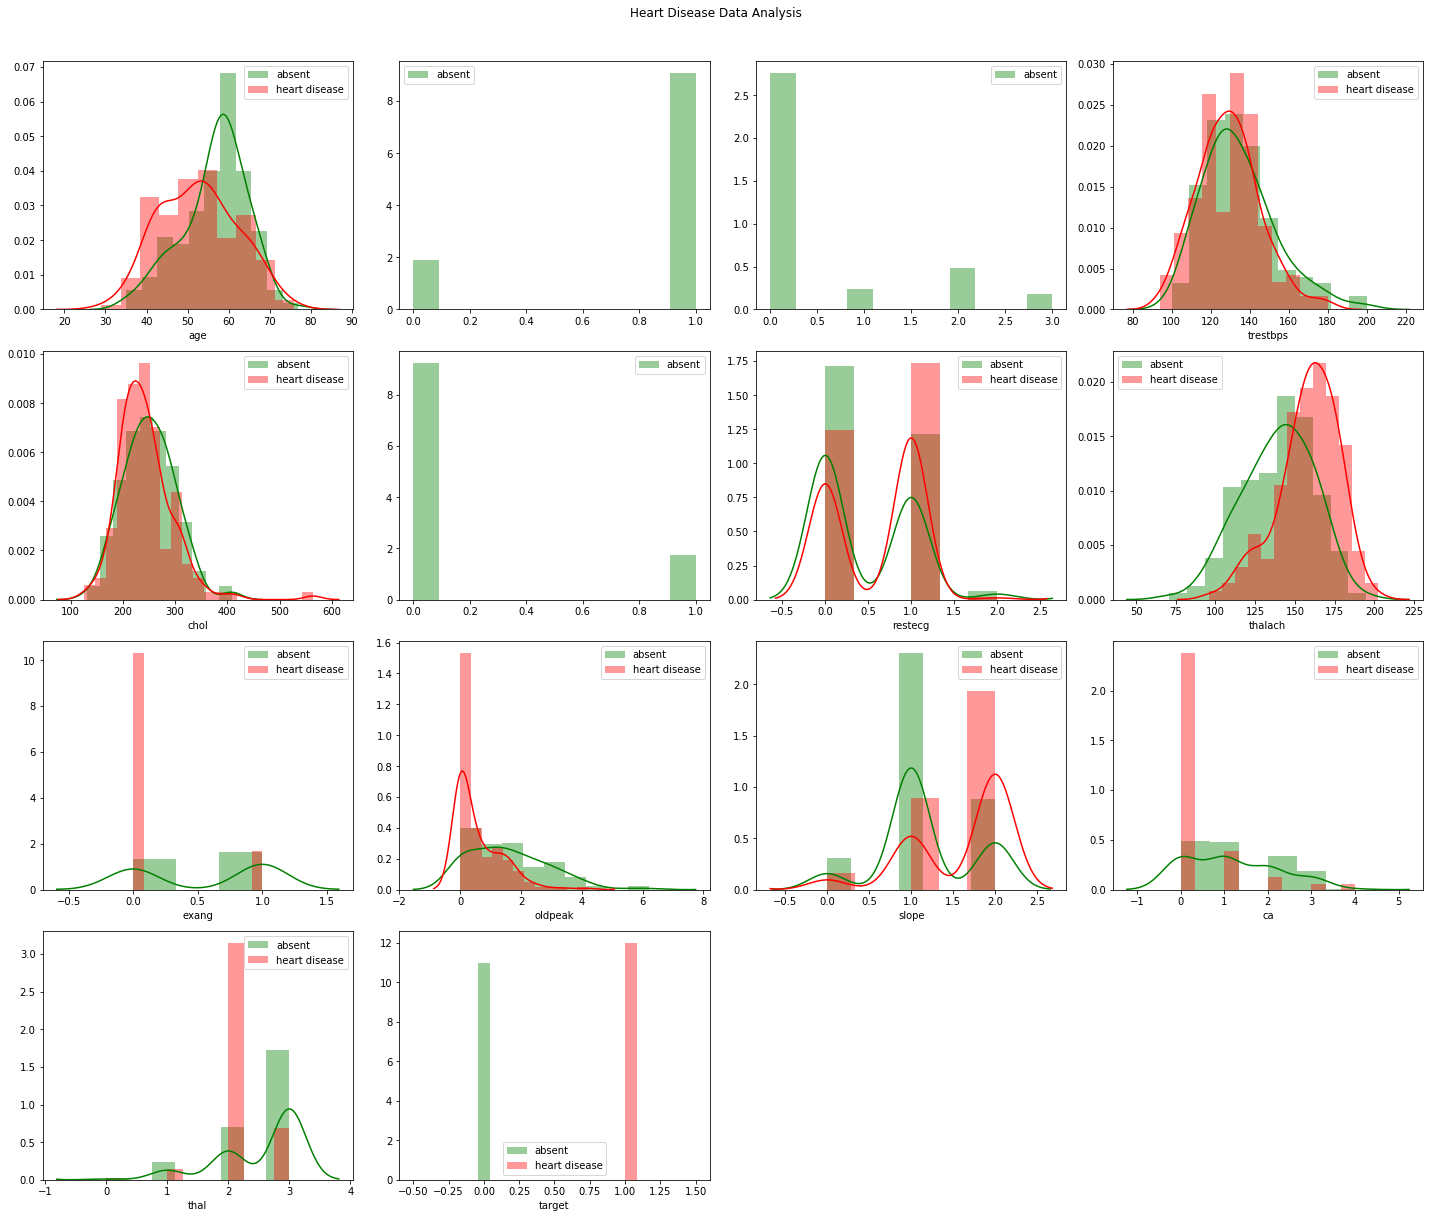

In [102]:


fig = plt.figure(figsize = (20, 25))
j = 0
for i in df.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    try:
        sns.distplot(df[i][df['target']==0], color='g', label = 'absent')
        sns.distplot(df[i][df['target']==1], color='r', label = 'heart disease')
        
    except RuntimeError as re:
        if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
            #sns.distplot(df[i], kde_kws={'bw': 0.1})
    
            sns.distplot(df[i][df['target']==0], color='g', label = 'absent', kde_kws={'bw': 0.1})
            sns.distplot(df[i][df['target']==1], color='r', label = 'heart disease', kde_kws={'bw': 0.1})
    
    plt.legend(loc='best')
fig.suptitle('Heart Disease Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Text(0.5, 1.0, 'Count Analysis of Target Variable')

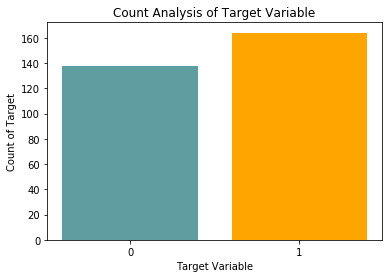

In [76]:
# Target class appears to be of equal size based on histogram above.  Confirm with a coutn analysis

tar_counts = df['target'].value_counts()

plt.bar(df['target'].unique(), tar_counts, color = ['orange', 'cadetblue'])
plt.xticks([0, 1])
plt.xlabel('Target Variable')
plt.ylabel('Count of Target')
plt.title('Count Analysis of Target Variable')

In [77]:
# Assess the percent data with heart disease versus without

tar_counts / df['target'].count()   
    

1    0.543046
0    0.456954
Name: target, dtype: float64

### Data Processing for Machine Learning Use

In [7]:
# Prepare the data for train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [108]:
# Split the data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [109]:
# Scale the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


### Naive Bayes Model

In [110]:
# Create Naive Bayes Machine Learning Model

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
nb_cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = nb_classifier.predict(X_train)
nb_cm_train = confusion_matrix(y_pred_train, y_train)


In [111]:
# Print Naive Bayes (NB) Accuracy Metrics

print('NB Accuracy for training set = {}'.format((nb_cm_train[0][0] + nb_cm_train[1][1])/len(y_train)))
print('NB Accuracy for test set = {}'.format((nb_cm_test[0][0] + nb_cm_test[1][1])/len(y_test)))

nb_train_val = (nb_cm_train[0][0] + nb_cm_train[1][1])/len(y_train)
nb_test_val = (nb_cm_test[0][0] + nb_cm_test[1][1])/len(y_test)


NB Accuracy for training set = 0.8257261410788381
NB Accuracy for test set = 0.8688524590163934


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

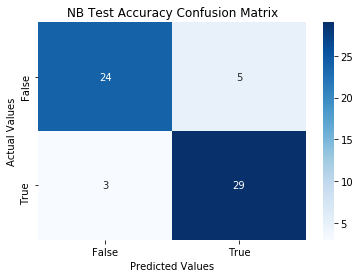

In [112]:
# Plot Confusion Matrix NB Test Accuracy

ax = sns.heatmap(nb_cm_test, annot=True, cmap='Blues', fmt = 'g')
ax.set_title('NB Test Accuracy Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

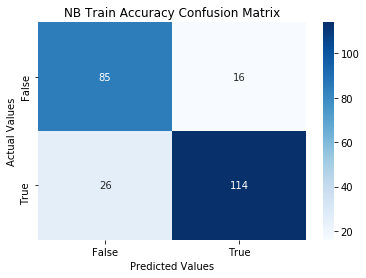

In [113]:
# Plot Confusion Matrix NB Train Accuracy

ax = sns.heatmap(nb_cm_train, annot=True, cmap='Blues', fmt = 'g')
ax.set_title('NB Train Accuracy Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

### SVM Model

In [115]:
# Create Support Vector Machine Learning Model

svm_classifier = SVC(kernel = 'rbf')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
svm_cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = svm_classifier.predict(X_train)
svm_cm_train = confusion_matrix(y_pred_train, y_train)


In [116]:
# Print SVM Accuracy metrics

print('SVM Accuracy for training set = {}'.format((svm_cm_train[0][0] + svm_cm_train[1][1])/len(y_train)))
print('SVM Accuracy for test set = {}'.format((svm_cm_test[0][0] + svm_cm_test[1][1])/len(y_test)))

sv_train_val = (svm_cm_train[0][0] + svm_cm_train[1][1])/len(y_train)
sv_test_val = (svm_cm_test[0][0] + svm_cm_test[1][1])/len(y_test)


SVM Accuracy for training set = 0.9087136929460581
SVM Accuracy for test set = 0.9016393442622951


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

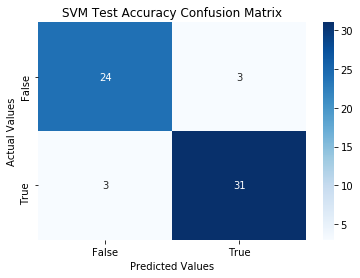

In [117]:
# Plot Confusion Matrix SVM Test Accuracy

ax = sns.heatmap(svm_cm_test, annot=True, cmap='Blues', fmt = 'g')
ax.set_title('SVM Test Accuracy Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

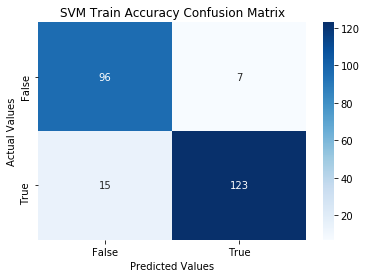

In [118]:
# Plot Confusion Matrix SVM Train Accuracy

ax = sns.heatmap(svm_cm_train, annot=True, cmap='Blues', fmt = 'g')
ax.set_title('SVM Train Accuracy Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

### Logistic Regression Modeal

In [119]:
# Create Logistic Regression Machine Learning Model

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

y_pred = lr_classifier.predict(X_test)
lr_cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = lr_classifier.predict(X_train)
lr_cm_train = confusion_matrix(y_pred_train, y_train)


In [120]:
# Print Logestic Regression (LR) Accuracy Metrics

print('LR Accuracy for training set = {}'.format((lr_cm_train[0][0] + lr_cm_train[1][1])/len(y_train)))
print('LR Accuracy for test set = {}'.format((lr_cm_test[0][0] + lr_cm_test[1][1])/len(y_test)))

lr_train_val = (lr_cm_train[0][0] + lr_cm_train[1][1])/len(y_train)
lr_test_val = (lr_cm_test[0][0] + lr_cm_test[1][1])/len(y_test)


LR Accuracy for training set = 0.8506224066390041
LR Accuracy for test set = 0.8688524590163934


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

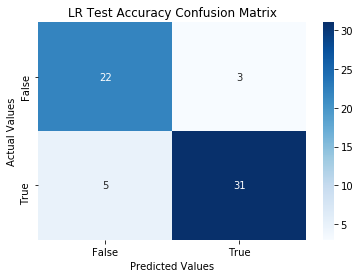

In [121]:
# Plot Confusion Matrix LR Test Accuracy

ax = sns.heatmap(lr_cm_test, annot=True, cmap='Blues', fmt = 'g')
ax.set_title('LR Test Accuracy Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

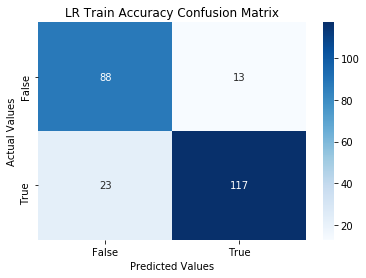

In [122]:
# Plot Confusion Matrix LR Train Accuracy

ax = sns.heatmap(lr_cm_train, annot=True, cmap='Blues', fmt = 'g')
ax.set_title('LR Train Accuracy Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])


### Decision Tree Model

In [123]:
# Create a Decision Tree Machine Learning Model

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
dt_cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = dt_classifier.predict(X_train)
dt_cm_train = confusion_matrix(y_pred_train, y_train)


In [124]:
# Print Decision Tree (DT) Accuracy Metrics

print('DT Accuracy for training set = {}'.format((dt_cm_train[0][0] + dt_cm_train[1][1])/len(y_train)))
print('DT Accuracy for test set = {}'.format((dt_cm_test[0][0] + dt_cm_test[1][1])/len(y_test)))

dt_train_val = (dt_cm_train[0][0] + dt_cm_train[1][1])/len(y_train)
dt_test_val = (dt_cm_test[0][0] + dt_cm_test[1][1])/len(y_test)


DT Accuracy for training set = 1.0
DT Accuracy for test set = 0.7704918032786885


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

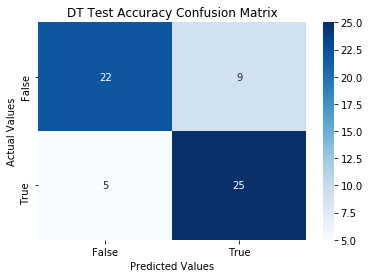

In [125]:
# Plot Confusion Matrix DT Test Accuracy

ax = sns.heatmap(dt_cm_test, annot=True, cmap='Blues', fmt = 'g')
ax.set_title('DT Test Accuracy Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

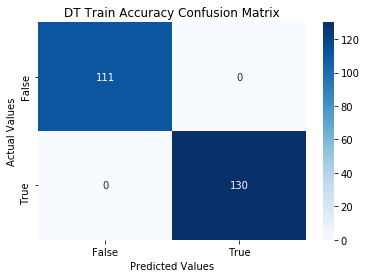

In [126]:
# Plot Confusion Matrix DT Train Accuracy

ax = sns.heatmap(dt_cm_train, annot=True, cmap='Blues', fmt = 'g')
ax.set_title('DT Train Accuracy Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

### Random Forest Model

In [127]:
# Create a Random Forest Machine Learning Model

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
rf_cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = rf_classifier.predict(X_train)
rf_cm_train = confusion_matrix(y_pred_train, y_train)


In [128]:
# Print Random Forest (DT)) Accuracy Metrics

print('RF Accuracy for training set = {}'.format((rf_cm_train[0][0] + rf_cm_train[1][1])/len(y_train)))
print('RF Accuracy for test set = {}'.format((rf_cm_test[0][0] + rf_cm_test[1][1])/len(y_test)))

rf_train_val = (rf_cm_train[0][0] + rf_cm_train[1][1])/len(y_train)
rf_test_val = (rf_cm_test[0][0] + rf_cm_test[1][1])/len(y_test)


RF Accuracy for training set = 1.0
RF Accuracy for test set = 0.8688524590163934


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

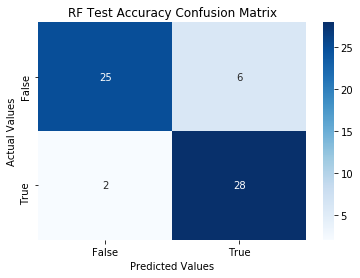

In [129]:
# Plot Confusion Matrix RF Test Accuracy

ax = sns.heatmap(rf_cm_test, annot=True, cmap='Blues', fmt = 'g')
ax.set_title('RF Test Accuracy Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

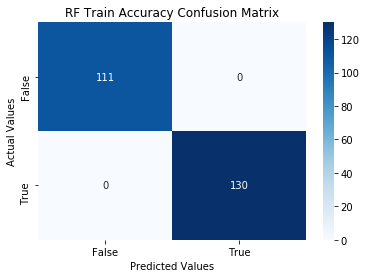

In [130]:
# Plot Confusion Matrix RF Train Accuracy

ax = sns.heatmap(rf_cm_train, annot=True, cmap='Blues', fmt = 'g')
ax.set_title('RF Train Accuracy Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])


### Compare the Different Model Performance

In [131]:
dict_vals ={'train_outcome': list([nb_train_val, sv_train_val, lr_train_val, dt_train_val, rf_train_val]), 
            'test_outcome': list([nb_test_val, sv_test_val, lr_test_val, dt_test_val, rf_test_val])}

outcome_df = pd.DataFrame((dict_vals), index = ['NB', 'SVM', 'LR', 'DT', 'RF'])

In [132]:
outcome_df

,train_outcome,test_outcome
NB,0.825726,0.868852
SVM,0.908714,0.901639
LR,0.850622,0.868852
DT,1.000000,0.770492
RF,1.000000,0.868852


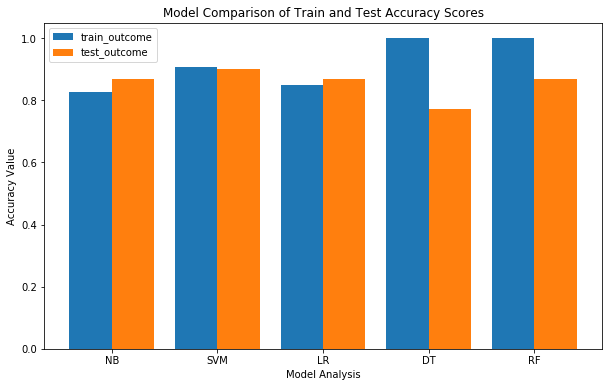

In [133]:
x_names = ['NB', 'SVM', 'LR', 'DT', 'RF']

w = 0.4
bar1 = np.arange(len(x_names))
bar2 = [i+w for i in bar1]

plt.figure(figsize = (10, 6))
plt.bar(bar1, outcome_df['train_outcome'], w, label = 'train_outcome')
plt.bar(bar2, outcome_df['test_outcome'], w, label = 'test_outcome')

plt.xlabel('Model Analysis')
plt.ylabel('Accuracy Value')
plt.title('Model Comparison of Train and Test Accuracy Scores')
plt.xticks(bar1+w/2, x_names)
plt.legend()